# Lab 8: Neural Network

In this lab, we will start with neural network. We will learn how to build and a train a neural network using Python library Keras.

## Lab 8. Part0: Classify hand-written digits

We will take a look at a first concrete example of a neural network using Keras library: https://keras.io/. First, you have to install Keras library. Here is the instructions: https://keras.io/#installation. As you saw in documentation you have first to install TensorFlow, Theano, or CNTK and then Keras library. We recommend the TensorFlow backend. <br>
We will learn how to classify hand-written digits. Unless you already have experience with Keras or similar libraries, you will not understand everything about this first example right away. Don't worry if some steps seem arbitrary or look like magic to you! We've got to start somewhere.

The problem we are trying to solve here is to classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 categories (0 to 9). The dataset we will use is the MNIST dataset, a classic dataset in the machine learning community, which has been around for almost as long as the field itself and has been very intensively studied. It's a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. You can think of "solving" MNIST as the "Hello World" of deep learning -- it's what you do to verify that your algorithms are working as expected. As you get deep in machine learning field, you will see MNIST come up over and over again, in scientific papers, blog posts, and so on.

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging from 0 to 9. There is a one-to-one correspondence between the images and the labels.<br>
Let's have a look at the training data:

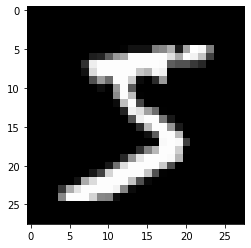

This is a handwritten number  5
Shape of input matrix:  (60000, 28, 28)


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

image_nr = 0
plt.imshow(train_images[image_nr], cmap='gray', vmin=0, vmax=255)
plt.show()
print('This is a handwritten number ', train_labels[image_nr])

print('Shape of input matrix: ', train_images.shape)

#### Question 1: The 'shape' of the matrix is (60000, 28, 28). What do each of these numbers mean?

Our workflow will be as follow: first we will present our neural network with the training data, train_images and train_labels. The network will then learn to associate images and labels. Finally, we will ask the network to produce predictions for test_images, and we will verify if these predictions match the labels from test_labels. Let's build our network:

In [4]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

The core building block of neural networks is the "layer", a data-processing module which you can conceive as "transforming" your data. Some  data comes in, and comes out in a more useful form. Precisely, layers extract _representations_ out of the data fed into them -- hopefully  representations that are more meaningful for the problem at hand. Most of deep learning really consists of chaining together simple (or sometimes more complex) layers which will implement a form of progressive "data distillation". A deep learning model is like a sieve for data processing, made of a  succession of increasingly refined data filters -- the "layers".

Here our network consists of a sequence of two `Dense` layers, which are densely-connected (also called "fully-connected") neural layers. 
The second (and last) layer is a 10-way "softmax" layer, which means it will return an array of 10 probability scores (summing to 1). Each score will be the probability that the current digit image belongs to one of our 10 digit classes.

#### Question 2: Could you explain why we use 'relu' in first layer and 'softmax' in the second layer?
#### Question 3: A friend tells you that 'tanh' can be a good activation function. To try it out, do you replace 'relu', 'softmax' or both? Justify your answer.

To make our network ready for training, we need to pick three more things, as part of "compilation" step:

* A loss function: this is how the network will be able to measure how good a job it is doing on its training data, and thus how it will be 
able to steer itself in the right direction.
* An optimizer: this is the mechanism through which the network will update itself based on the data it sees and its loss function.
* Metrics to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly 
classified).

In [5]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

#### Question 4: Could you explain why we use 'categorical_crossentropy' for loss function?

Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in 
the `[0, 1]` interval. Previously, our training images for instance were stored in an array of shape `(60000, 28, 28)` of type `uint8` with 
values in the `[0, 255]` interval. We transform it into a `float32` array of shape `(60000, 28 * 28)` with values between 0 and 1.

In [6]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [7]:
import numpy as np
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

As you could see from the result above that labels are digits, ranging from 0 to 9. We will turn them into vectors of 0s and 1s. We will do that with categorically encoding. Concretely, this means for instance turning the sequence [3, 5] into a 60,000-dimensional vector that would be all-zeros except for indices 3 and 5, which would be ones.

In [8]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

We are now ready to train our network, which in Keras is done via a call to the `fit` method of the network: 
we "fit" the model to its training data.

In [9]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.2608 - accuracy: 0.9246
Epoch 2/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.1036 - accuracy: 0.9695
Epoch 3/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.0676 - accuracy: 0.9793
Epoch 4/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.0501 - accuracy: 0.9851
Epoch 5/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.0368 - accuracy: 0.9890


Two quantities are being displayed during training: the "loss" of the network over the training data, and the accuracy of the network over 
the training data.

We quickly reach an accuracy of 0.989 (i.e. 98.9%) on the training data. Now let's check that our model performs well on the test set too:

In [10]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 52us/step


In [11]:
print('test_acc:', test_acc)

test_acc: 0.9789000153541565


Our test set accuracy turns out to be 97.8% -- that's quite a bit lower than the training set accuracy. 

#### Question 5: What will be an example of overfiting here?

#### Question 6: Try to play with numbers of epochs and batch_size. What is your result compared to what we got?

This concludes our very first example of neural network. We learn how we could build and a train a neural network to classify handwritten digits.

## Lab 8, Part 1:   Convolutional Neural Networks (CNN) 

In this Part1, we will learn how to train CNNs. All the code is provided. The code is allowing you to prepare the data and train a CNN that classifies which digit is written in an image provided at its input. We will show how you can train 4 different CNN, ranging from simple to more complex, and let you observe how it impacts classification accuracy. 

CNN training can take quite a bit of time (particularly if GPU isn't used), so we will create a training data set that uses a subset of available data. In particular, we will define the classification problem as recognizing whether a digit in an image is 7 or not. The following piece of code shows the data preparation steps.

In [12]:
#Import the required libraries
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import Adam

The following block selects a subset of images from the MNIST data.

In [13]:
#Load the training and testing data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_test_orig = X_test

# Select the subset from the train data for the sake of time.
np.random.seed(1)  # for reproducibilty!!
# The subset is composed of all the examples where the digit is 7, and 20,000 examples are not 7.
sevens = np.where(y_train == 7)[0].tolist()
not_sevens = np.where(y_train != 7)[0].tolist()
num_keepers = 10000
not_sevens = np.random.choice(not_sevens, num_keepers, replace=False).tolist()

subset = sevens + not_sevens
np.random.shuffle(subset) # shuffle the input

X_train = X_train[subset, :, :]
y_train = y_train[subset]

#### Question 1: Write some code in the above cell to check how many 'sevens' and how many 'not_sevens' there are in our training data? What is the accuracy of a classifier that always predicts that the input is not a seven?

The following code creates training and test data. It would be great if you can spend a few minutes trying to understand what is going on.

In [14]:
from keras import backend as K

img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    shape_ord = (1, img_rows, img_cols)
else:  # channel_last
    shape_ord = (img_rows, img_cols, 1)

# Normalize the images:

X_train = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test = X_test.reshape((X_test.shape[0],) + shape_ord)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255


# Converting the labels to binary classification(Seven =1,Not Seven=0)
Y_train = (y_train == 7).astype(int)
Y_test = (y_test == 7).astype(int)

# Converting the classes to its binary categorical form
nb_classes = 2
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)

### Train a simple CNN (CNN, model 1)

The following code will show how you can define CNN, train it, and test its accuracy. 

**Step 0.** The following is a preparation step, specifying the hyperparameters.

In [15]:
# -- Initializing the values for the convolution neural network

nb_epoch = 2  # kept very low! Please increase if you have GPU

batch_size = 64
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

# SGD
optimizer = Adam(lr=0.0002, amsgrad=True)

**Step 1.** In this step we define architecture of the CNN

Each line "model.add()" adds another layer to the neural network. The type of layer must be specified. 

In [16]:
model = Sequential()

model.add(Conv2D(nb_filters, (nb_conv, nb_conv), padding='valid', 
                 input_shape=shape_ord))  # note: the very first layer **must** always specify the input_shape
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(26, 26)))
model.add(Flatten())
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

We can check the configuration of the above model by call model.summary()

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
Total params: 386
Trainable params: 386
Non-trainable params: 0
________________________________________________________

## Question 2: From the above summary, can you explain the architecture of this CNN?

**Step 2.** Here, we define the loss function. You will see that the loss function is not Mean Square Error, but Cross Entropy. Cross Entropy is a very popular choice when training neural networks for classification problems.

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

**Step 3.** This line of code trains CNN. This is going to take about a minute. Observe that we will only have 2 epochs of training, for the sake of time. You will see how the accuracy on training and valiadion data evolves during training.

In [19]:
nb_epoch = 10
hist = model.fit(X_train, Y_train, batch_size=batch_size, 
                 epochs=nb_epoch, verbose=1, 
                 validation_data=(X_test, Y_test))

Train on 16265 samples, validate on 10000 samples
Epoch 1/10
16265/16265 [==============================] - 7s 412us/step - loss: 0.6707 - accuracy: 0.5935 - val_loss: 0.5357 - val_accuracy: 0.8972
Epoch 2/10
16265/16265 [==============================] - 7s 400us/step - loss: 0.6511 - accuracy: 0.6148 - val_loss: 0.5115 - val_accuracy: 0.8972
Epoch 3/10
16265/16265 [==============================] - 6s 396us/step - loss: 0.6361 - accuracy: 0.6148 - val_loss: 0.5051 - val_accuracy: 0.8972
Epoch 4/10
16265/16265 [==============================] - 6s 396us/step - loss: 0.6193 - accuracy: 0.6152 - val_loss: 0.4920 - val_accuracy: 0.8972
Epoch 5/10
16265/16265 [==============================] - 6s 396us/step - loss: 0.6001 - accuracy: 0.6269 - val_loss: 0.4954 - val_accuracy: 0.9103
Epoch 6/10
16265/16265 [==============================] - 6s 398us/step - loss: 0.5790 - accuracy: 0.6833 - val_loss: 0.4349 - val_accuracy: 0.9066
Epoch 7/10
16265/16265 [==============================] - 6s 3

Let us plot the accuracy. 

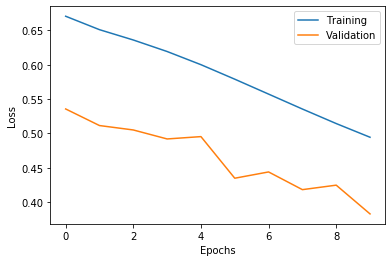

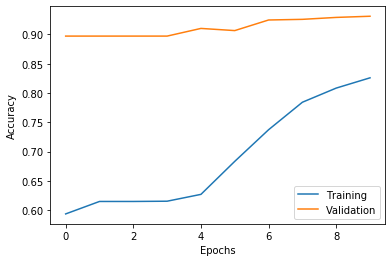

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Training', 'Validation'], loc='lower right')

**Step 4.** Evaluate the accuracy on test data.

In [21]:
# Evaluating the model on the test data    
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Test Loss: 0.3828853796482086
Test Accuracy: 0.9311000108718872


Let us visualize our model Predictions!

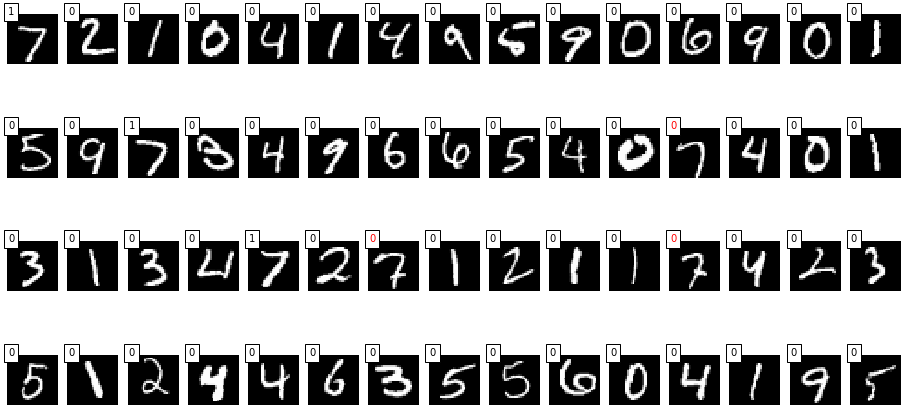

In [22]:
def show_results(model):
    rows = 4
    columns = 15
    sliced = rows*columns
    predicted = model.predict(X_test[:sliced]).argmax(-1)

    plt.figure(figsize=(16,8))
    for i in range(sliced):
        plt.subplot(rows, columns, i+1)
        plt.imshow(X_test_orig[i], cmap='gray', vmin=0, vmax=255)
        color = 'black' if Y_test[i, 1] == predicted[i] else 'red'
        plt.text(0, 0, predicted[i], color=color, 
                 bbox=dict(facecolor='white', alpha=1))
        plt.axis('off')

show_results(model)

#### Question 2: Can you discuss the performance of the CNN model? What kind of errors is it making?

#### Question 3: Run the training for 10 epochs. How did it impact the accuracy?

### Train a more complicated CNN (CNN, model 2)

Now, we will define a more complicated CNN architecture.

In [23]:
model = Sequential()
model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                 padding='valid', input_shape=shape_ord))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Flatten())
model.add(Dense(16))
model.add(Activation('relu'))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [24]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_3 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                86544     
_________________________________________________________________
activation_4 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                

In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

nb_epoch = 5
model.fit(X_train, Y_train, batch_size=batch_size, 
          epochs=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Train on 16265 samples, validate on 10000 samples
Epoch 1/5
16265/16265 [==============================] - 19s 1ms/step - loss: 0.1101 - accuracy: 0.9613 - val_loss: 0.0615 - val_accuracy: 0.9801
Epoch 2/5
16265/16265 [==============================] - 19s 1ms/step - loss: 0.0698 - accuracy: 0.9765 - val_loss: 0.0467 - val_accuracy: 0.9860
Epoch 3/5
16265/16265 [==============================] - 19s 1ms/step - loss: 0.0595 - accuracy: 0.9804 - val_loss: 0.0389 - val_accuracy: 0.9884
Epoch 4/5
16265/16265 [==============================] - 19s 1ms/step - loss: 0.0520 - accuracy: 0.9842 - val_loss: 0.0458 - val_accuracy: 0.9856
Epoch 5/5
16265/16265 [==============================] - 19s 1ms/step - loss: 0.0473 - accuracy: 0.9852 - val_loss: 0.0370 - val_accuracy: 0.9889


In [26]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.037049294634908435
Test accuracy: 0.9889000058174133


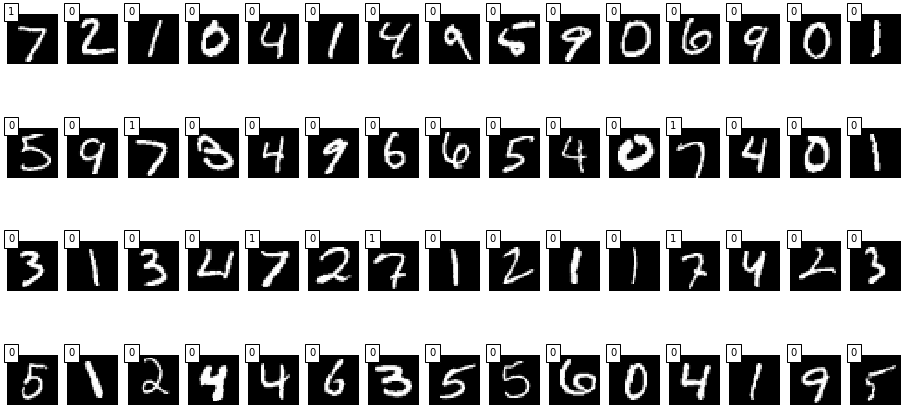

In [27]:
show_results(model)

**Question 4.** Can you explain the architecture of this CNN (model 2) and how is it different from the first CNN you trained (model 1)? Compare their performance by looking at the visualizstions.

### Adding more convolutional layers and MaxPooling layers (CNN, model 3)

Now, we will define an even more complicated CNN architecture.

In [28]:
model = Sequential()
model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                 padding='valid', input_shape=shape_ord))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Conv2D(nb_filters, (nb_conv, nb_conv), 
                 padding='valid'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Flatten())
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [29]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_6 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)               

In [30]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          epochs=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Train on 16265 samples, validate on 10000 samples
Epoch 1/5
16265/16265 [==============================] - 28s 2ms/step - loss: 0.1148 - accuracy: 0.9595 - val_loss: 0.0688 - val_accuracy: 0.98019  - ETA: 13 - ETA: 1s - l
Epoch 2/5
16265/16265 [==============================] - 28s 2ms/step - loss: 0.0577 - accuracy: 0.9816 - val_loss: 0.0344 - val_accuracy: 0.9886
Epoch 3/5
16265/16265 [==============================] - 28s 2ms/step - loss: 0.0448 - accuracy: 0.9861 - val_loss: 0.0315 - val_accuracy: 0.9902
Epoch 4/5
16265/16265 [==============================] - 28s 2ms/step - loss: 0.0383 - accuracy: 0.9885 - val_loss: 0.0250 - val_accuracy: 0.9920
Epoch 5/5
16265/16265 [==============================] - 28s 2ms/step - loss: 0.0341 - accuracy: 0.9899 - val_loss: 0.0223 - val_accuracy: 0.9923


In [31]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.02225096878828481
Test accuracy: 0.9922999739646912


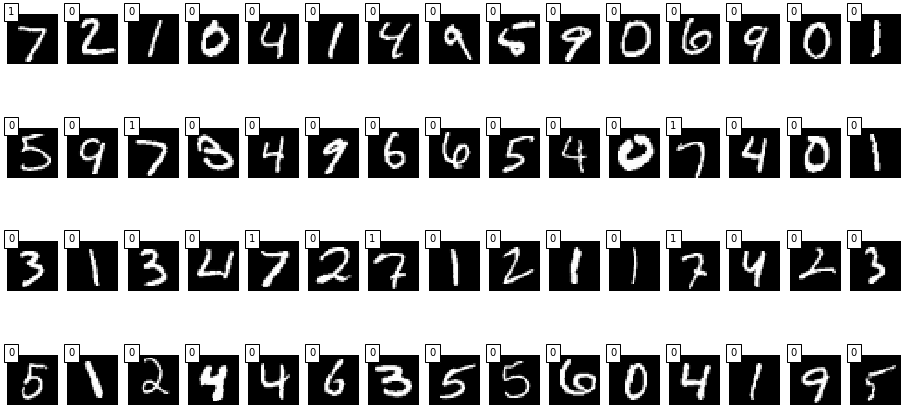

In [32]:
show_results(model)

Another small improvement.

### Wrapping all the code together and play with hyperparameters

The code below wraps up the pieces of codes above into a single function and allows you to play with the hyperparameters by changing the arguments. Try to get the best performans with only 2 training epochs!


In [33]:
nb_epoch = 2

In [34]:
# Function for constructing the convolution neural network
# Feel free to add parameters, if you want

def build_model(num_conv = 1, conv_activation = "relu", num_dense = 1, dense_activation  = "relu", 
               dropout = True, max_pooling = True):
    """"""
    model = Sequential()
    model.add(Conv2D(nb_filters, (nb_conv, nb_conv), 
                     padding='valid',
                     input_shape=shape_ord))
    model.add(Activation(conv_activation))
    
    for i in range(num_conv-1):
        model.add(Conv2D(nb_filters, (nb_conv, nb_conv)))
        model.add(Activation(conv_activation))
        
    if max_pooling is True:
        model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
        
    if dropout is True:
        model.add(Dropout(0.25))
    
    model.add(Flatten())

    if dropout is True:
        model.add(Dropout(0.5))
    
    for i in range(num_dense-1):
        model.add(Dense(128))
        model.add(Activation(dense_activation))
        
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

    model.fit(X_train, Y_train, batch_size=batch_size, 
              epochs=nb_epoch,verbose=1,
              validation_data=(X_test, Y_test))
          

    #Evaluating the model on the test data    
    score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
    print(num_conv , 'convolutional layers,', num_dense, "dense layers")
    if max_pooling: print("With max pooling")
    if dropout: print("With dropout")
    print('Test score:', score)
    print('Test accuracy:', accuracy)
    show_results(model)

An example of running this function

Train on 16265 samples, validate on 10000 samples
Epoch 1/2
16265/16265 [==============================] - 13s 772us/step - loss: 0.3095 - accuracy: 0.8891 - val_loss: 0.1224 - val_accuracy: 0.9726
Epoch 2/2
16265/16265 [==============================] - 12s 753us/step - loss: 0.1711 - accuracy: 0.9378 - val_loss: 0.1186 - val_accuracy: 0.9647
1 convolutional layers, 1 dense layers
With max pooling
With dropout
Test score: 0.1185660111695528
Test accuracy: 0.9646999835968018


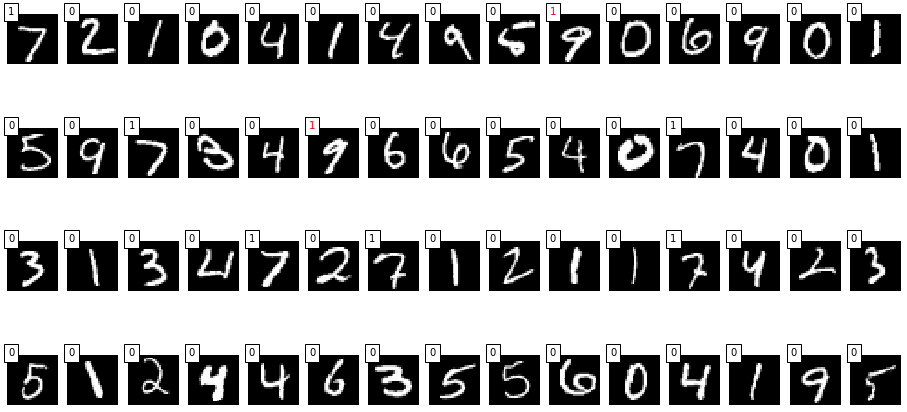

In [35]:
# Here is an example of running build_model() with default hyperparameters
build_model()

Train on 16265 samples, validate on 10000 samples
Epoch 1/2
16265/16265 [==============================] - 75s 5ms/step - loss: 0.4381 - accuracy: 0.7754 - val_loss: 0.0806 - val_accuracy: 0.9764
Epoch 2/2
16265/16265 [==============================] - 75s 5ms/step - loss: 0.1539 - accuracy: 0.9429 - val_loss: 0.0648 - val_accuracy: 0.9798
3 convolutional layers, 3 dense layers
With max pooling
With dropout
Test score: 0.06478125965446234
Test accuracy: 0.9797999858856201


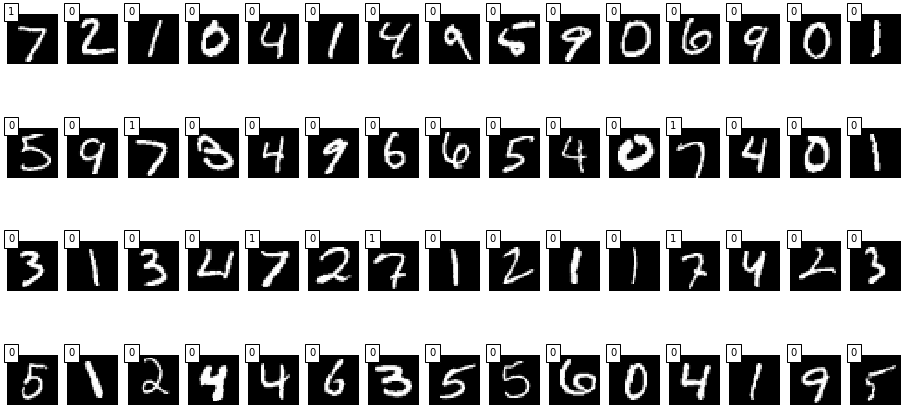

In [36]:
# Here is an example of running build_model() with new hyperparameters
build_model(num_conv = 3, num_dense = 3)

Train on 16265 samples, validate on 10000 samples
Epoch 1/2
16265/16265 [==============================] - 13s 776us/step - loss: 0.3078 - accuracy: 0.8939 - val_loss: 0.1416 - val_accuracy: 0.9641
Epoch 2/2
16265/16265 [==============================] - 12s 767us/step - loss: 0.1610 - accuracy: 0.9412 - val_loss: 0.1173 - val_accuracy: 0.9636
1 convolutional layers, 1 dense layers
With max pooling
With dropout
Test score: 0.1173161559164524
Test accuracy: 0.9635999798774719
29 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


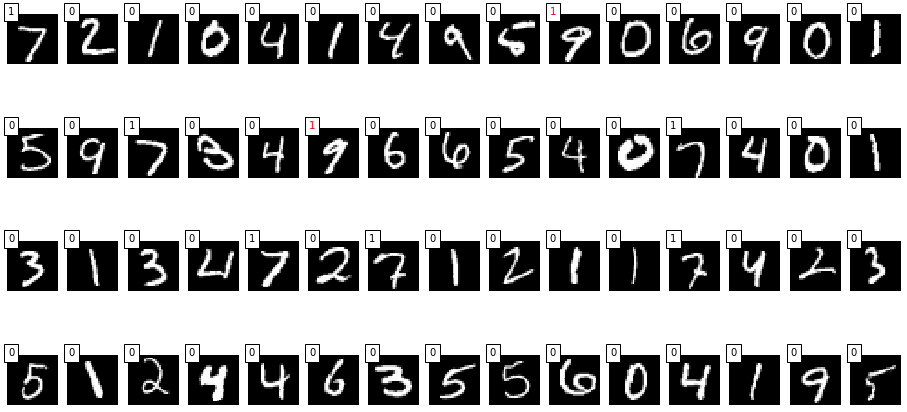

In [37]:
#Timing how long it takes to build the model and test it.
%timeit -n1 -r1 build_model()

#### Question 5: Try to change some of the **hyperparameters** without exploding the computational resources on your computer and only using 2 training epochs. 
What is the best accuracy you can get? How many trainable parameters does your model have? How long does the training take?

#### Question 6 (20% of the grade)

Can you train a model to output 10 classes instead of 2 binary classes? We can use this model to classify images into 10 digits of the mnist data set. Again, we will only train our model on a subset of the training data. The following steps will help you to build such a model.

    * 1. Select 20,000 examples randomly from X_train, since we want all 10 digits present in our training data.
    * 2. Convert Y_train and Y_test to categorical.
    * 3. Call the build_model() on the X_train and Y_train.

#### Question 7 (30% of the grade) 

Train a model on CIFAR10 dataset, which is described in https://www.cs.toronto.edu/~kriz/cifar.html. You can load the dataset from Keras, too. CIFAR10 small image classification contains 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

```python
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
```

Again, we will only train our model on a subset of the training data. The following steps will help you to build such a model.

    * 1. Select 20,000 examples randomly from X_train, since we want all 10 categories present in our training data.
    * 2. Convert Y_train and Y_test to categorical.
    * 3. Call the build_model() on the X_train and Y_train.